<font size="6">Calculate the Tolerance Factor<font>

In [1]:
import pandas as pd

In [2]:
# Load the antiperovskite data
antiperovskite_data_path = 'Data/1_data_with_raw_APs.csv'
antiperovskite_data = pd.read_csv(antiperovskite_data_path)

In [4]:
# Load the ionic radii data
ionic_radius_path = 'Data/Ionic_Radius.xlsx'
ionic_radius_data = pd.read_excel(ionic_radius_path)
ionic_radii_lookup = dict(zip(ionic_radius_data['Ion'], ionic_radius_data['Radius (pm)']))

In [5]:
# Define a function to calculate the tolerance factor
def calculate_tolerance_factor(row, radii_lookup):
    r_X = radii_lookup.get(row['X'], 0)
    r_A = radii_lookup.get(row['A'], 0)
    r_B = radii_lookup.get(row['B'], 0)
    r_A_d = radii_lookup.get(row['A_d'], 0) if pd.notna(row['A_d']) else 0
    
    numerator = r_X + row['A_w'] * r_A + row['A_dw'] * r_A_d if pd.notna(row['A_dw']) else r_X + row['A_w'] * r_A
    denominator = (2**0.5) * (r_X + r_B)
    
    return numerator / denominator if denominator != 0 else None

In [8]:
# Apply the function
antiperovskite_data['Tolerance_Factor'] = antiperovskite_data.apply(lambda row: calculate_tolerance_factor(row, ionic_radii_lookup), axis=1)

In [11]:
# Save to csv
output_path = 'Data/2_APs_with_Tolerance_Factor.csv'
antiperovskite_data.to_csv(output_path, index=False)

<font size="6">Screen based on the Tolerance Factor<font>

In [12]:
file_path = 'Data/2_APs_with_Tolerance_Factor.csv'
data = pd.read_csv(file_path)

# Screen Tolerance Factor for 0.7~1.2
filtered_data = data[(data['Tolerance Factor'] >= 0.7) & (data['Tolerance Factor'] <= 1.1)]

# Save to csv
filtered_file_path = 'Data/3_APs_with_Filtered_Tolerance_Factor.csv'
filtered_data.to_csv(filtered_file_path, index=False)

<font size="6">Plot the Tolerance Factor Distribution<font>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

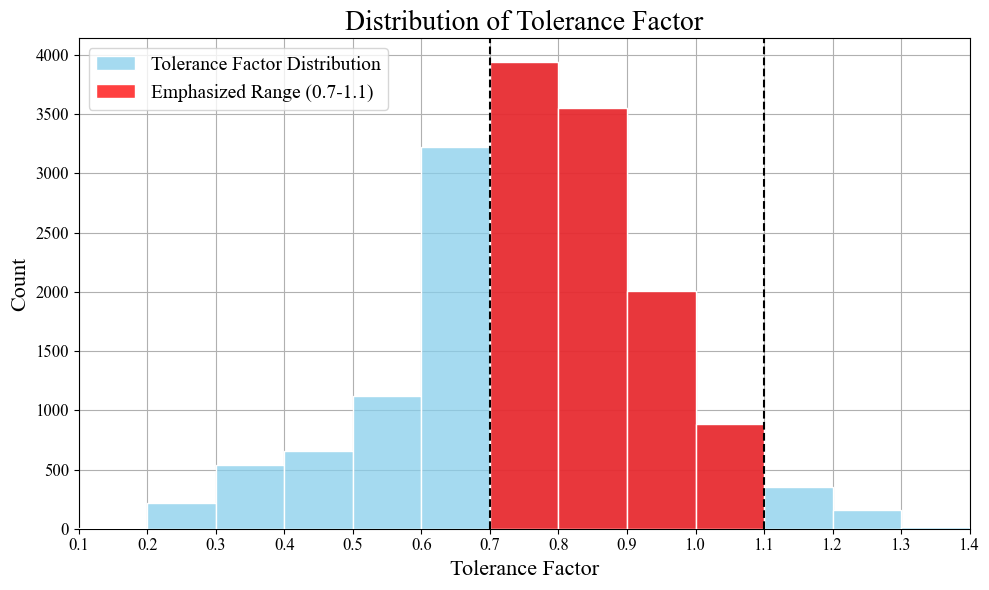

In [15]:
# make sure matplotlibcould use Times New Roman font
plt.rcParams["font.family"] = "Times New Roman"

data = pd.read_csv('Data/2_APs_with_Tolerance_Factor.csv')  
tolerance_factors = data['Tolerance_Factor']

tick_interval = 0.1
highlight_start = 0.7
highlight_end = 1.1

data_min = tolerance_factors.min()
data_max = tolerance_factors.max()
xmin = np.floor(data_min*10)/10
xmax = np.ceil(data_max*10)/10
xmin = min(xmin, highlight_start)
xmax = max(xmax, highlight_end)

bins = np.arange(xmin, xmax + tick_interval, tick_interval)
if highlight_end not in bins:
    bins = np.sort(np.append(bins, highlight_end))

highlight_bins = bins[(bins >= highlight_start) & (bins <= highlight_end)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(tolerance_factors, bins=bins, kde=False, color="skyblue", edgecolor='white', label='Tolerance Factor Distribution', ax=ax, zorder=3)
sns.histplot(tolerance_factors[tolerance_factors.between(highlight_bins[0], highlight_bins[-1], inclusive="left")], bins=highlight_bins, kde=False, color="red", edgecolor='white', label='Emphasized Range (0.7-1.1)', ax=ax, zorder=3)

ax.legend()
ax.set_title('Distribution of Tolerance Factor', fontsize=20, fontname='Times New Roman')
ax.set_xlabel('Tolerance Factor', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('Count', fontsize=16, fontname='Times New Roman')
ax.set_xlim(xmin, xmax)
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_interval))

for xc in [0.7, 1.1]:
    ax.axvline(x=xc, color='k', linestyle='--', zorder=4)

ax.grid(True, zorder=0)
plt.legend(fontsize='14')
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

final_fig_no_text_path = 'Figure/Tolerance_Factor_Distribution.png'
fig.savefig(final_fig_no_text_path)